In [1]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 40.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [3]:
url = 'https://drive.google.com/file/d/1eLQtwd-dxX35qb7jQoJT3Ns0BOow8KKX/view?usp=share_link' # train
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

In [4]:
# setting that we can see all the columns
pd.set_option('display.max_columns', None)

In [5]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.shape

(1460, 81)

In [7]:
#X_num = list(X_train.select_dtypes(include='number').columns)
#X_txt = list(X_train.select_dtypes(exclude='number').columns)
#conditions = ('Qual', 'Cond', 'Qu', 'QC')
#X_con = []
#for item in X_txt:
#  if item.endswith(conditions):
#    X_con.append(item)
#    X_txt.remove(item)
#qualities = ['None', 'TA', 'Po', 'Fa', 'Gd', 'Ex']

In [8]:
#X_con

**We set the certain features to category data type**

In [9]:
cat_ordinal = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']

for col in cat_ordinal:
    data[col] = data[col].astype('category')

**Splitting the data, dropping Id column to reduce the noise**

In [10]:
X = data.drop(columns="Id").copy()
y = X.pop('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

**Let's see how dummy model performs**

In [12]:
data.corrwith(data['SalePrice']).sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
dtype: float

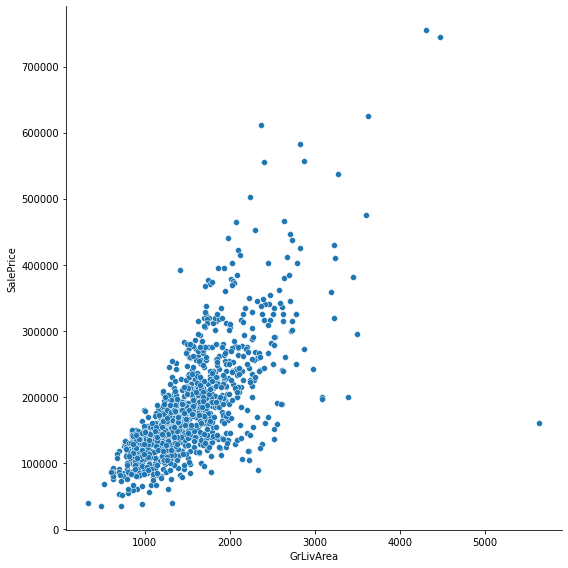

In [13]:
sns.relplot(x=X_train['GrLivArea'],y=y_train,height=8)

In [14]:
# GrLivArea * 120

dummy_model_predictions = X_test['GrLivArea'] *120
dummy_model_predictions

1260    201000
274      97920
51      141120
117     135000
789     250440
         ...  
801     143520
1292    284640
197     373440
780     150360
360     109440
Name: GrLivArea, Length: 292, dtype: int64

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [16]:
dummy_rmse = mean_squared_error(y_true = y_test, y_pred = dummy_model_predictions, squared=False)
dummy_rmsle = mean_squared_log_error(y_true = y_test, y_pred = dummy_model_predictions, squared=False)

In [17]:
dummy_rmse

56174.56008694976

In [18]:
dummy_rmsle

0.2676638471550853

**Now, let's create a better model.** 

First, we created pipelines. 

Here we split the data to numerical and categorical.
We apply simple imputer to replace the missing values with the mean values in numeric data and with 'None' and 'NaN' values in categorical data. We also applyed Encoders for the categorical values.

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [20]:
qualities = ['None', 'TA', 'Po', 'Fa', 'Gd', 'Ex']

In [21]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy='mean')
)
categorical_pipe_ordinal = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='None')),
    (OrdinalEncoder(categories=[qualities]*10))
)
categorical_pipe_onehot = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='NaN')),
    (OneHotEncoder(handle_unknown='ignore',sparse_output=False))
)

In [22]:
preprocessor = make_column_transformer(
    (numeric_pipe,make_column_selector(dtype_include='number')),
    (categorical_pipe_ordinal,make_column_selector(dtype_include='category')),
    (categorical_pipe_onehot,make_column_selector(dtype_include='object'))
)

In [23]:
dt_pipeline = make_pipeline(
                            preprocessor, 
                            DecisionTreeRegressor()).set_output(transform='pandas')

dt_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75cb50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75c3a0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75c700>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [24]:
dt_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75cb50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75c3a0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75c700>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [25]:
dt_predictions = dt_pipeline.predict(X_test)

In [26]:
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_rmsle = mean_squared_log_error(y_true = y_test, y_pred = dt_predictions, squared=False)

In [27]:
dt_rmse

45055.1418647043

In [28]:
dt_rmsle

0.19557237918482984

**Adding feature selection**

SelectFromModel

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

selectfeatures = SelectFromModel(DecisionTreeRegressor())

In [30]:
dt2_pipeline = make_pipeline(
                            preprocessor,
                            selectfeatures, 
                            DecisionTreeRegressor()).set_output(transform='pandas')

dt2_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75cb50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75c700>)])),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeRegressor())),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [31]:
dt2_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75cb50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75c700>)])),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeRegressor())),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [32]:
dt2_predictions = dt2_pipeline.predict(X_test)

In [33]:
dt2_rmse = mean_squared_error(y_true = y_test, y_pred = dt2_predictions, squared=False)
dt2_rmsle = mean_squared_log_error(y_true = y_test, y_pred = dt2_predictions, squared=False)

In [34]:
dt2_rmse

42156.43252156432

In [35]:
dt2_rmsle

0.18732210091332535

SelectFromModel show not the best results, let's continue with the SearchCV to find the best model parameters.

And change model from DecisionTree to RandomForest.

**RandomizedSearchCV**

Let's find the best model parameters. 

First with RandomizedSearch for the broader look to save the computational time and that we will tune it with the GridSearch for narrow search.

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
pipe_RandomForest = make_pipeline(
    (preprocessor),
    (RandomForestRegressor(random_state=123))
)

In [38]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    
    'columntransformer__pipeline-1__simpleimputer__strategy':['mean','median'],
    'randomforestregressor__max_depth':[5,10,15,20,25,30,35,40,45,50,55],
    'randomforestregressor__min_samples_leaf':[2,4,6],
    'randomforestregressor__n_estimators':[5,10,30,40],
}

random_search = RandomizedSearchCV(
    pipe_RandomForest,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    random_state=123,
    verbose=1,
)

In [39]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75cb50>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(fill_value='None',
                                                                                                              strategy='constant')...
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=123))]),
                   n_iter=50,
                   param_distributions={'columntransformer__pipeline-1__simpleimputer__strategy': ['mean',
                                                                                                   'median'],
                                        'randomforestregressor__max_depth': [5,
                                                                             10,
                                                                             15,
                                                                             20,
                                                                             25,
                                                                             30,
                                                                             35,
                                                                             40,
                                                                             45,
                                                                             50,
                                                                             55],
                                        'randomforestregressor__min_samples_leaf': [2,
                                                                                    4,
                                                                                    6],
                                        'randomforestregressor__n_estimators': [5,
                                                                                10,
                                                                                30,
                                                                                40]},
                   random_state=123, verbose=1)

In [40]:
random_search.best_params_

{'randomforestregressor__n_estimators': 30,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__max_depth': 30,
 'columntransformer__pipeline-1__simpleimputer__strategy': 'median'}

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'randomforestregressor__max_depth':range(39,40,41),
    'randomforestregressor__min_samples_leaf':[1,2],
    'randomforestregressor__n_estimators':range(40,41,42)
}

grid_search = GridSearchCV(
    pipe_RandomForest,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    scoring='neg_mean_squared_log_error'
)

In [42]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75cb50>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='None',
                                                                                                        strategy='constant')),
                                                                                         ('or...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75c700>)])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             param_grid={'randomforestregressor__max_depth': range(39, 40, 41),
                         'randomforestregressor__min_samples_leaf': [1, 2],
                         'randomforestregressor__n_estimators': range(40, 41, 42)},
             scoring='neg_mean_squared_log_error', verbose=1)

In [43]:
grid_search.best_params_

{'randomforestregressor__max_depth': 39,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__n_estimators': 40}

In [44]:
rf_bestestimator = grid_search.best_estimator_.predict(X_test)

In [45]:
rf_rmse = mean_squared_error(y_true = y_test, y_pred = rf_bestestimator, squared=False)
rf_rmsle = mean_squared_log_error(y_true = y_test, y_pred = rf_bestestimator, squared=False)

In [46]:
rf_rmse

31617.243161800507

In [47]:
rf_rmsle

0.14205048662742914

In [48]:
grid_search.best_estimator_.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0a754a60>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0a6ad9a0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=39, min_samples_leaf=2,
                                       n_estimators=40, random_state=123))])

**This looks better**

rf_rmsle = 0.0612

**That how it would look like if we do it manually**

In [49]:
rfc_pipeline = make_pipeline(
                            preprocessor,
                            RandomForestRegressor(
                                  random_state=123,
                                  max_depth=39,
                                  min_samples_leaf=2,
                                  n_estimators=40)).set_output(transform='pandas')

rfc_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75cb50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75c700>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=39, min_samples_leaf=2,
                                       n_estimators=40, random_state=123))])

In [50]:
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75cb50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75c700>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=39, min_samples_leaf=2,
                                       n_estimators=40, random_state=123))])

In [51]:
manual = rfc_pipeline.predict(X_test)

In [52]:
manual_rmsle = mean_squared_log_error(y_true = y_test, y_pred = manual, squared=False)

In [53]:
manual_rmsle

0.14205048662742914

**Let's see linear regression model**

In [54]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [55]:
er_pipeline = make_pipeline(preprocessor, 
                            StandardScaler(),
                            LinearRegression()).set_output(transform='pandas')

In [56]:
er_pipeline.fit(X_train, np.log(y_train))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75cb50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75c3a0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd0d75c700>)])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [57]:
er_predictions = np.exp(er_pipeline.predict(X_test))

In [58]:
er_rmsle = mean_squared_log_error(y_true = y_test, y_pred = er_predictions, squared=False)

In [59]:
er_rmsle

1.023346724396772

Ups, not good at all.

**Now, let's apply the best model I found till now with the best parameters.**

It is RandomForestRegressor with best parameters I found. And now I will apply this trained model to the new data set.

In [60]:
url = "https://drive.google.com/file/d/1HyODh2TjoavvlhXrQhqPkMKz5vDcOiya/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data2 = pd.read_csv(path)
data2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [61]:
id_column = data2.pop('Id')

In [62]:
predictions = grid_search.best_estimator_.predict(data2)

In [63]:
result = pd.DataFrame({'Id':id_column, 'SalePrice':predictions})

In [64]:
result

,Id,SalePrice
0,1461,132251.375000
1,1462,154321.011667
2,1463,177906.036667
3,1464,180754.382500
4,1465,199599.712341
...,...,...
1454,2915,83042.192262
1455,2916,84750.825000
1456,2917,153499.092262
1457,2918,115697.069286


In [65]:
from google.colab import files
result.to_csv('result_Natalia_DataScientist_3.csv',index=False)
files.download('result_Natalia_DataScientist_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>